
# Spam Detection

**Author**: Yuyao Wang

**Date**: June 2024  


## Objective
To build a spam detection system that identifies whether a given SMS message is spam or not. This project uses classic NLP techniques for text preprocessing and feature extraction, combined with machine learning models like Naive Bayes.



## **Project Steps**
1. **Data Loading and Exploration**  
   We use a public dataset containing SMS messages labeled as "spam" or "ham" (not spam).  
2. **Data Preprocessing**  
   Clean and standardize text data to remove noise.  
3. **Feature Extraction**  
   Convert text data into numeric features using TF-IDF vectorization.  
4. **Model Training**  
   Train a Naive Bayes classifier to classify messages as spam or ham.  
5. **Model Evaluation**  
   Evaluate the trained model using metrics like accuracy, precision, recall, and F1-score.  
6. **Testing and Deployment**  
   Create a function to predict whether new messages are spam or ham.




In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import re  # For text preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [2]:


# Load the SMS Spam Collection dataset
def load_data():
    # Public dataset URL (you can replace this with a local file path)
    url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
    # Load the data into a Pandas DataFrame
    data = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])
    return data

# Load the data
data = load_data()

# Display basic information about the dataset
print("Dataset Preview:")
print(data.head())
print("\nClass Distribution:")
print(data['label'].value_counts())



Dataset Preview:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Class Distribution:
ham     4825
spam     747
Name: label, dtype: int64


### 2. Data Preprocessing
#### Steps:
1. Convert text to lowercase.
2. Remove punctuation and special characters.
3. Remove extra whitespace.

In [3]:
def preprocess_text(text):
    # Remove non-alphanumeric characters and convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Replace non-word characters with space
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = text.strip().lower()  # Trim and convert to lowercase
    return text

# Apply preprocessing to the message column
data['cleaned_message'] = data['message'].apply(preprocess_text)

# Preview cleaned data
print("\nCleaned Messages Preview:")
print(data[['message', 'cleaned_message']].head())


Cleaned Messages Preview:
                                             message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                     cleaned_message  
0  go until jurong point crazy available only in ...  
1                            ok lar joking wif u oni  
2  free entry in 2 a wkly comp to win fa cup fina...  
3        u dun say so early hor u c already then say  
4  nah i don t think he goes to usf he lives arou...  



### **3. Feature Extraction**
We use **TF-IDF (Term Frequency-Inverse Document Frequency)** to convert text into numerical features.  
- TF-IDF captures the importance of words while reducing the weight of commonly occurring words.


In [4]:
# Initialize a TfidfVectorizer with stop words removal
vectorizer = TfidfVectorizer(max_features=3000, stop_words='english')

# Convert text to feature vectors
X = vectorizer.fit_transform(data['cleaned_message']).toarray()

# Convert labels to binary values (1 for spam, 0 for ham)
y = np.where(data['label'] == 'spam', 1, 0)


### **4. Train-Test Split**
Split the dataset into training and testing sets to evaluate the model's performance.


In [5]:
# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

Training samples: 4457, Testing samples: 1115


### **5. Model Training**
We use **Multinomial Naive Bayes**, which is well-suited for text classification tasks.  
Naive Bayes assumes word occurrences are independent, which often works well in NLP tasks.


In [6]:
# Initialize and train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

print("Model training complete!")

Model training complete!



### **6. Model Evaluation**
Evaluate the model using metrics such as accuracy, precision, recall, and F1-score. A confusion matrix is also included for further insight.


In [7]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate performance
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Evaluation:
Accuracy: 0.9865

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.90      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115


Confusion Matrix:
[[966   0]
 [ 15 134]]



### **7. Testing with New Data**
Create a reusable function to classify new messages as spam or ham.


In [8]:
# Define a prediction function
def predict_spam(message):
    # Preprocess the input message
    cleaned = preprocess_text(message)
    # Transform the message into a feature vector
    features = vectorizer.transform([cleaned]).toarray()
    # Make prediction
    prediction = model.predict(features)[0]
    return "Spam" if prediction == 1 else "Not Spam"

# Test the function with example messages
test_message = "Congratulations! You've won a free ticket to Bahamas. Call now!"
print(f"Message: '{test_message}' --> {predict_spam(test_message)}")

test_message_2 = "Hey, are we still meeting tomorrow?"
print(f"Message: '{test_message_2}' --> {predict_spam(test_message_2)}")

Message: 'Congratulations! You've won a free ticket to Bahamas. Call now!' --> Spam
Message: 'Hey, are we still meeting tomorrow?' --> Not Spam



# **Spam Detection Project Without Labels**

### **Objective**
To build a spam detection system using unsupervised learning techniques, such as clustering or anomaly detection. This approach avoids the need for labeled data and identifies spam messages based on their differences from the majority of messages.





## **Approach**
1. **Text Preprocessing**  
   Clean the text data to remove noise and prepare it for feature extraction.  
2. **Feature Extraction**  
   Convert text into numerical vectors using techniques like TF-IDF.  
3. **Clustering or Anomaly Detection**  
   Use clustering (e.g., K-Means) or anomaly detection (e.g., Isolation Forest) to group similar messages or identify outliers (potential spam).  
4. **Evaluation**  
   Assess the performance qualitatively (e.g., manual inspection or domain expertise).


In [9]:


# Import required libraries
import pandas as pd
import numpy as np
import re  # For text preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [10]:

# Load the SMS dataset (no labels needed here)
def load_data():
    # Public dataset URL (or use a local file)
    url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
    data = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])
    return data['message']  # Only return the messages (ignore labels)

# Load the messages
messages = load_data()

# Display the first few messages
print("Sample Messages:")
print(messages.head())

Sample Messages:
0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object



### Text Preprocessing

#### Steps:
1. Remove punctuation and convert text to lowercase.
2. Remove extra whitespace or special characters.

In [11]:

# Define a text preprocessing function
def preprocess_text(text):
    # Remove non-alphanumeric characters and convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Replace non-word characters with spaces
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = text.strip().lower()  # Trim and convert to lowercase
    return text

# Apply preprocessing to all messages
cleaned_messages = messages.apply(preprocess_text)

# Display preprocessed messages
print("\nCleaned Messages:")
print(cleaned_messages.head())


Cleaned Messages:
0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in 2 a wkly comp to win fa cup fina...
3          u dun say so early hor u c already then say
4    nah i don t think he goes to usf he lives arou...
Name: message, dtype: object



### Feature Extraction

#### Use TF-IDF Vectorizer:
- TF-IDF converts text data into numerical vectors while reducing the importance of frequently occurring words.


In [12]:

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=3000, stop_words='english')

# Transform messages into feature vectors
X = vectorizer.fit_transform(cleaned_messages).toarray()

print(f"\nFeature Matrix Shape: {X.shape}")  # Rows = messages, Columns = features


Feature Matrix Shape: (5572, 3000)



### Unsupervised Spam Detection

#### **Option A: Clustering with K-Means**
K-Means groups messages into clusters, which we can inspect manually to identify spam groups.


In [13]:
# Apply K-Means clustering
n_clusters = 2  # Assume 2 clusters: spam and non-spam
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Assign cluster labels to messages
clusters = kmeans.labels_
messages_with_clusters = pd.DataFrame({'message': messages, 'cluster': clusters})

# Inspect the clusters
print("\nSample Messages in Cluster 0:")
print(messages_with_clusters[messages_with_clusters['cluster'] == 0].head())

print("\nSample Messages in Cluster 1:")
print(messages_with_clusters[messages_with_clusters['cluster'] == 1].head())


Sample Messages in Cluster 0:
                                               message  cluster
41   Did I forget to tell you ? I want you , I need...        0
66   Today is "song dedicated day.." Which song wil...        0
105       Umma my life and vava umma love you lot dear        0
116  As I entered my cabin my PA said, '' Happy B'd...        0
126                               Good stuff, will do.        0

Sample Messages in Cluster 1:
                                             message  cluster
0  Go until jurong point, crazy.. Available only ...        1
1                      Ok lar... Joking wif u oni...        1
2  Free entry in 2 a wkly comp to win FA Cup fina...        1
3  U dun say so early hor... U c already then say...        1
4  Nah I don't think he goes to usf, he lives aro...        1



#### Anomaly Detection with Isolation Forest
Isolation Forest detects outliers in the data, which can correspond to spam messages.


In [14]:

# Apply Isolation Forest
isolation_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
outliers = isolation_forest.fit_predict(X)

# Add the outlier labels to the dataset
messages_with_outliers = pd.DataFrame({'message': messages, 'outlier': outliers})

# Outlier label: -1 = anomaly (potential spam), 1 = normal
print("\nSample Anomalous Messages (Potential Spam):")
print(messages_with_outliers[messages_with_outliers['outlier'] == -1].head())





Sample Anomalous Messages (Potential Spam):
                                              message  outlier
2   Free entry in 2 a wkly comp to win FA Cup fina...       -1
9   Had your mobile 11 months or more? U R entitle...       -1
11  SIX chances to win CASH! From 100 to 20,000 po...       -1
12  URGENT! You have won a 1 week FREE membership ...       -1
35  Yup... Ok i go home look at the timings then i...       -1


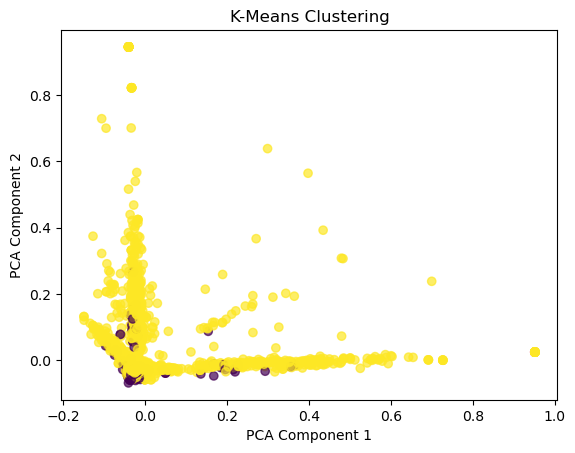

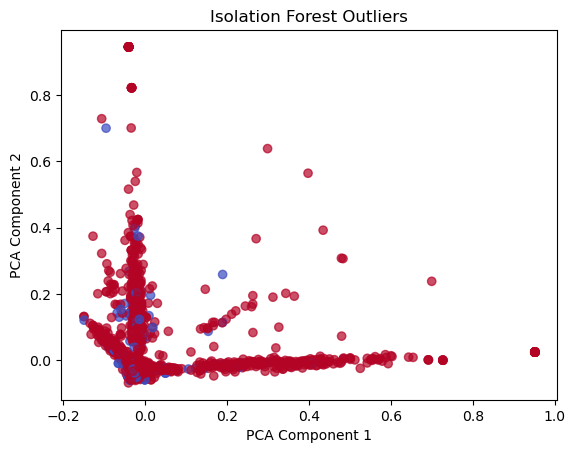

In [15]:

#### Use PCA for dimensionality reduction and plot the clusters or outliers.

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Plot clusters (for K-Means)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title("K-Means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# Plot outliers (for Isolation Forest)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=outliers, cmap='coolwarm', alpha=0.7)
plt.title("Isolation Forest Outliers")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

### **Evaluation of the Two Plots**

#### **1. K-Means Clustering (First Plot)**

- The plot uses **PCA** to reduce the feature space of TF-IDF vectors into two components for visualization. Yellow and dark purple points represent the two clusters identified by the K-Means algorithm.


- The majority of data points are grouped in the large yellow cluster, while the dark purple cluster is much smaller. This likely reflects the natural imbalance in the SMS dataset, where spam messages are typically fewer than ham messages. The separation between the clusters is not very distinct, as there is significant overlap between the two groups in the reduced space.



#### **2. Isolation Forest Outliers (Second Plot)**


- Red points likely represent inliers (ham messages), while blue points represent detected outliers (potential spam messages).  Like the first plot, PCA is used for dimensionality reduction.


- Isolation Forest effectively identifies outliers scattered in low-density regions of the plot, as evidenced by the blue points dispersed away from dense red clusters. The majority of blue points are concentrated in regions overlapping with red points, suggesting potential false positives in detecting spam.


- Isolation Forest is sensitive to contamination hyperparameters, which control the expected proportion of anomalies. The setting here may have led to over-detection of outliers. Some inliers close to the boundary regions may be incorrectly flagged as anomalies, reducing the precision of spam detection.



#### **Conclusion**
- The **K-Means Clustering** plot shows suboptimal separation, which may lead to higher misclassification rates. It’s better suited for balanced datasets or combined with post-clustering alignment techniques.
- The **Isolation Forest** plot demonstrates a reasonable ability to detect outliers, though its performance depends heavily on tuning and may need additional refinement for imbalanced data.




In [16]:

#### Load Real Labels

# Reload dataset to include true labels
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
data_with_labels = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

# Preprocess text again (if needed)
data_with_labels['cleaned_message'] = data_with_labels['message'].apply(preprocess_text)

# True labels: Convert to binary (1 for spam, 0 for ham)
true_labels = np.where(data_with_labels['label'] == 'spam', 1, 0)



#### Evaluation for K-Means Clustering
Here, we align clusters with real labels by finding the dominant true label in each cluster (using a mapping). This allows us to calculate classification metrics.


In [17]:
from sklearn.metrics import classification_report, accuracy_score

# Align cluster labels with true labels
def align_clusters_with_labels(true_labels, predicted_clusters):
    mapping = {}
    for cluster in np.unique(predicted_clusters):
        # Find the most common true label in this cluster
        dominant_label = np.bincount(true_labels[predicted_clusters == cluster]).argmax()
        mapping[cluster] = dominant_label
    return np.array([mapping[cluster] for cluster in predicted_clusters])

# Map predicted clusters to real labels
aligned_clusters = align_clusters_with_labels(true_labels, clusters)

# Evaluate the performance
print("\nK-Means Clustering Evaluation:")
print(f"Accuracy: {accuracy_score(true_labels, aligned_clusters):.4f}")
print("Classification Report:")
print(classification_report(true_labels, aligned_clusters))


K-Means Clustering Evaluation:
Accuracy: 0.8659
Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      4825
           1       0.00      0.00      0.00       747

    accuracy                           0.87      5572
   macro avg       0.43      0.50      0.46      5572
weighted avg       0.75      0.87      0.80      5572



/Users/yuyao/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yuyao/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yuyao/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



#### Evaluation for Isolation Forest
The Isolation Forest outputs `-1` for outliers (potential spam) and `1` for inliers (ham). We convert these to match our true label convention (1 for spam, 0 for ham) and evaluate.


In [18]:

# Convert Isolation Forest output to match true label format
predicted_labels = np.where(outliers == -1, 1, 0)

# Evaluate the performance
print("\nIsolation Forest Evaluation:")
print(f"Accuracy: {accuracy_score(true_labels, predicted_labels):.4f}")
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))


Isolation Forest Evaluation:
Accuracy: 0.8733
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      4825
           1       0.54      0.40      0.46       747

    accuracy                           0.87      5572
   macro avg       0.72      0.67      0.69      5572
weighted avg       0.86      0.87      0.87      5572

